In [1]:
## 목적: 주어진 데이터를 활용하여 정확도를 최대로 높이세요.
'''

'dog' : 0
'elephant' : 1
'giraffe' : 2
'guitar' : 3
'horse' : 4
'house' : 5ㅡ
'person' : 6


'''

"\n\n'dog' : 0\n'elephant' : 1\n'giraffe' : 2\n'guitar' : 3\n'horse' : 4\n'house' : 5ㅡ\n'person' : 6\n\n\n"

In [ ]:
#  STEP1 데이터 탐색해보기 

In [2]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

sample = pd.read_csv("C:\\PythonLecture\\미술작품 분류하기\\data\\test_answer_sample_.csv")
sample.head()

,Unnamed: 0,answer value
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [3]:
# class와 label만들깅

In [4]:
classes = ['dog', 'elephant', 'giraffe','guitar','horse','house','person']
labels = {'dog':0, 'elephant':1, 'giraffe':2,'guitar':3,'horse':4,'house':5,'person':6}


In [5]:
path = "C:\\PythonLecture\\미술작품 분류하기\\data\\" 
train_path = os.path.join(path, "train")

In [6]:
## Training DF 만들기 

In [7]:
train = []
for c in classes:
    each = train_path+"\\"+c
    entries = os.listdir(each)
    for entry in entries:
        dirs = each + "\\"+entry
        train.append(dirs)
train

['C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_001.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_002.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_003.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_004.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_005.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_006.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_007.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_008.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_009.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_010.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_011.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_012.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_013.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_014.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\train\\dog\\pic_015.jpg',
 'C:\\PythonLecture\\미술작품 분류하기\\data\\tr

In [12]:
nums = []
category = []
for tr in train:
    keyword = tr.split("\\")[-2]
    if keyword in labels:
        category.append(keyword)
        nums.append(labels[keyword])

train_df = pd.DataFrame(nums)
train_df["Category"] = pd.DataFrame(category)
train_df["img_path"] = pd.DataFrame(train)

train_df

,0,Category,img_path
0,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
1,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
2,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
3,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
4,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
...,...,...,...
1693,6,person,C:\PythonLecture\미술작품 분류하기\data\train\person\p...
1694,6,person,C:\PythonLecture\미술작품 분류하기\data\train\person\p...
1695,6,person,C:\PythonLecture\미술작품 분류하기\data\train\person\p...
1696,6,person,C:\PythonLecture\미술작품 분류하기\data\train\person\p...


In [14]:
train_df.rename(columns={0:"Cateogory_num"}, inplace = True)
train_df

,Cateogory_num,Category,img_path
0,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
1,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
2,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
3,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
4,0,dog,C:\PythonLecture\미술작품 분류하기\data\train\dog\pic_...
...,...,...,...
1693,6,person,C:\PythonLecture\미술작품 분류하기\data\train\person\p...
1694,6,person,C:\PythonLecture\미술작품 분류하기\data\train\person\p...
1695,6,person,C:\PythonLecture\미술작품 분류하기\data\train\person\p...
1696,6,person,C:\PythonLecture\미술작품 분류하기\data\train\person\p...


In [9]:
## test_df 만들기

In [15]:
test_path = "C:\\PythonLecture\\미술작품 분류하기\\data\\test" 
file_list = os.listdir(test_path)

test = []
for file in file_list:
    dirs = os.path.join(test_path, file)
    test.append(dirs)

test_df = pd.DataFrame(test)
test_df

,0
0,C:\PythonLecture\미술작품 분류하기\data\test\0001.jpg
1,C:\PythonLecture\미술작품 분류하기\data\test\0002.jpg
2,C:\PythonLecture\미술작품 분류하기\data\test\0003.jpg
3,C:\PythonLecture\미술작품 분류하기\data\test\0004.jpg
4,C:\PythonLecture\미술작품 분류하기\data\test\0005.jpg
...,...
345,C:\PythonLecture\미술작품 분류하기\data\test\0346.jpg
346,C:\PythonLecture\미술작품 분류하기\data\test\0347.jpg
347,C:\PythonLecture\미술작품 분류하기\data\test\0348.jpg
348,C:\PythonLecture\미술작품 분류하기\data\test\0349.jpg


In [16]:



test_df.rename(columns={0:"img_path"}, inplace = True)
test_df

,img_path
0,C:\PythonLecture\미술작품 분류하기\data\test\0001.jpg
1,C:\PythonLecture\미술작품 분류하기\data\test\0002.jpg
2,C:\PythonLecture\미술작품 분류하기\data\test\0003.jpg
3,C:\PythonLecture\미술작품 분류하기\data\test\0004.jpg
4,C:\PythonLecture\미술작품 분류하기\data\test\0005.jpg
...,...
345,C:\PythonLecture\미술작품 분류하기\data\test\0346.jpg
346,C:\PythonLecture\미술작품 분류하기\data\test\0347.jpg
347,C:\PythonLecture\미술작품 분류하기\data\test\0348.jpg
348,C:\PythonLecture\미술작품 분류하기\data\test\0349.jpg


# training data에 있는 이미지 보기 

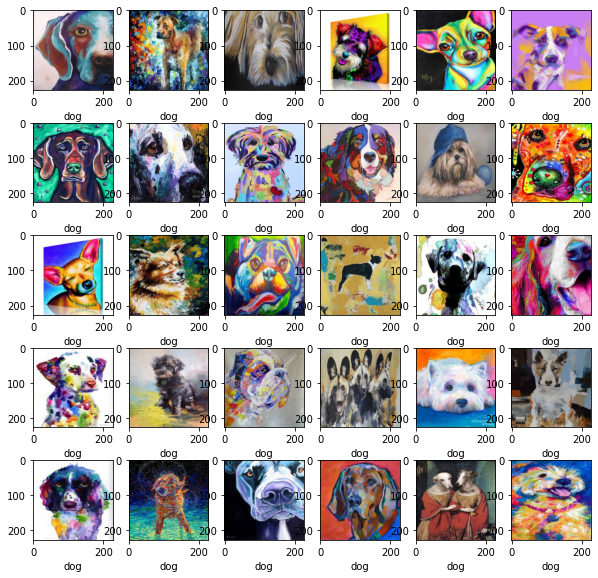

In [17]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    img = mpimg.imread(train_df["img_path"][i])
    plt.imshow(img)
    plt.xlabel(train_df["Category"][i])
plt.show()

    

In [18]:
#  test_df에 있는 이미지 보기 

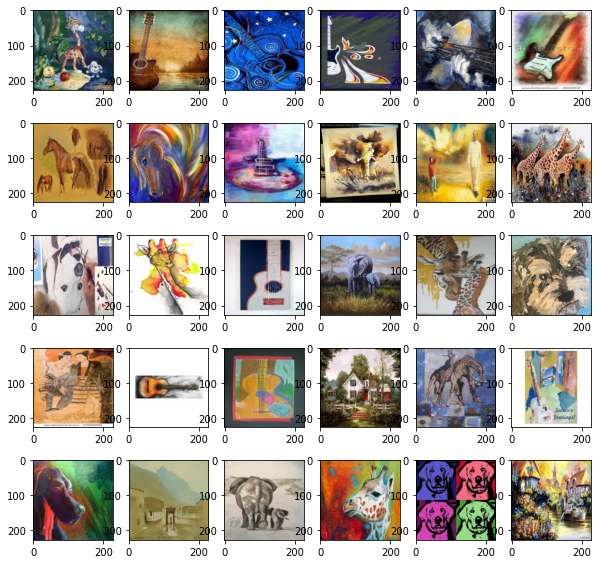

In [19]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    img = mpimg.imread(test_df["img_path"][i])
    plt.imshow(img)
plt.show()


# training data의 이미지갯수와 pixel

In [20]:
training_images = []
training_labels = []
for i in range(len(train_df)):    
    img = mpimg.imread(train_df["img_path"][i])
    # print(img.shape)  # (227, 227, 3)
    training_images.append(img)
    training_labels.append(train_df["Category"][i])

print(np.shape(training_images))
print(np.shape(training_labels))


(1698, 227, 227, 3)
(1698,)


## 해석
- ( 277, 277) 2차원 숫자 집합이 3개 존재 한다는 뜻이다.
-  만약 흑백이라면은 (1698,227,227) 이 된다
-  (1698, 227, 227, 3) : 하나의 이미지에는 227 x 227 x 3, 154587개의 숫자가 들어있고 이미지 하는 154587차원의 공간의 한 점으로 표현 

# test data의 이미지갯수와 pixel

In [52]:
test_images = []
for i in range(len(test_df)):    
    img = mpimg.imread(test_df["img_path"][i])
    test_images.append(img)
print(np.shape(test_images))


(350, 227, 227, 3)


# 데이터 전처리 

In [22]:
# 최대값이 255다!!
print(training_images[0].max(axis=0))
print(training_images[0].max(axis=1))

print(test_images[0].max(axis=0))
print(training_images[0].max(axis=1))

[[255 235 238]
 [255 238 239]
 [255 245 246]
 [255 245 246]
 [254 241 242]
 [255 242 244]
 [254 244 246]
 [255 245 246]
 [255 244 249]
 [254 243 247]
 [255 244 247]
 [254 244 247]
 [254 244 245]
 [254 244 246]
 [254 244 245]
 [253 244 246]
 [254 245 246]
 [254 245 246]
 [254 245 246]
 [255 246 247]
 [255 247 246]
 [255 246 245]
 [255 244 245]
 [252 243 244]
 [253 244 245]
 [253 243 250]
 [254 245 247]
 [254 245 246]
 [255 246 249]
 [255 247 250]
 [254 245 250]
 [253 246 249]
 [255 245 248]
 [255 248 251]
 [255 245 251]
 [255 244 254]
 [255 246 255]
 [255 245 251]
 [254 244 251]
 [255 245 253]
 [255 250 252]
 [255 249 254]
 [252 246 250]
 [254 246 252]
 [254 245 255]
 [254 245 247]
 [255 250 255]
 [253 250 255]
 [253 246 254]
 [253 243 249]
 [255 244 248]
 [255 245 247]
 [251 245 248]
 [251 243 249]
 [251 243 250]
 [252 243 251]
 [255 244 255]
 [255 245 252]
 [252 247 248]
 [255 246 246]
 [254 246 249]
 [252 247 252]
 [253 248 251]
 [252 250 248]
 [255 250 251]
 [255 250 252]
 [255 249 

# Scale these values to a range of 0 to 1 

In [23]:
training_images = []
for i in range(len(train_df)):    
    img = mpimg.imread(train_df["img_path"][i])
    new_img = img/255
    training_images.append(new_img)
print(np.shape(training_images))

(1698, 227, 227, 3)


In [50]:
test_images = [] 
for i in range(len(test_df)):    
    img = mpimg.imread(test_df["img_path"][i])
    new_img = img / 255    
    test_images.append(new_img)
print(np.shape(test_images))

(350, 227, 227, 3)


In [20]:
# 다시 이미비 한 번 봐보기 

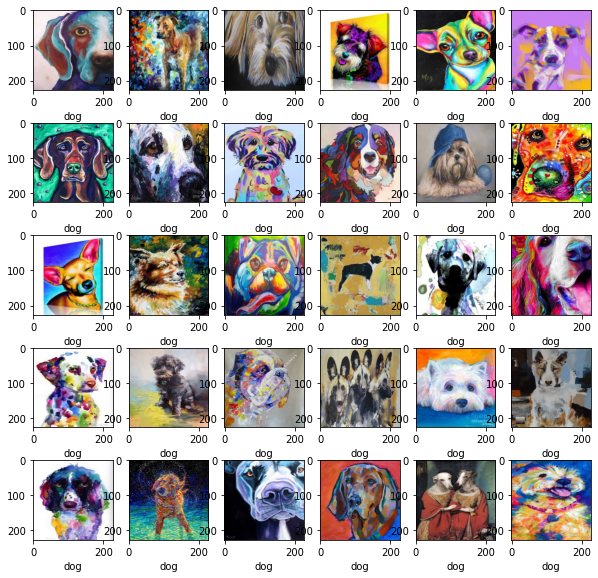

In [25]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(training_images[i])
    plt.xlabel(train_df["Category"][i])
plt.show()

    

# STEP 3 Build the model
- 3-1 configuring the layers of the model,
- 3-2 compiling the model.

In [26]:

type(training_images)
train_images = np.asarray(training_images)

In [27]:
train_images

array([[[[0.83921569, 0.76078431, 0.76470588],
         [0.9254902 , 0.85490196, 0.85490196],
         [0.95686275, 0.88627451, 0.88627451],
         ...,
         [0.17254902, 0.14901961, 0.39215686],
         [0.19607843, 0.19607843, 0.40784314],
         [0.39215686, 0.39215686, 0.60392157]],

        [[0.83921569, 0.76078431, 0.76470588],
         [0.9254902 , 0.85490196, 0.85490196],
         [0.96078431, 0.89019608, 0.89019608],
         ...,
         [0.20784314, 0.19215686, 0.42352941],
         [0.21568627, 0.21568627, 0.41960784],
         [0.40392157, 0.40392157, 0.61568627]],

        [[0.84313725, 0.76470588, 0.76862745],
         [0.92941176, 0.85882353, 0.85882353],
         [0.96470588, 0.89411765, 0.89411765],
         ...,
         [0.20784314, 0.20392157, 0.42745098],
         [0.18823529, 0.19607843, 0.38823529],
         [0.35686275, 0.36470588, 0.56470588]],

        ...,

        [[0.78823529, 0.71372549, 0.72156863],
         [0.78823529, 0.71372549, 0.72156863]

In [30]:
type(train_df.Cateogory_num)
train_labels = train_df.Cateogory_num.to_numpy()

In [31]:
print(train_images.shape)
print(train_labels.shape)

(1698, 227, 227, 3)
(1698,)


## Set up the layers

In [32]:
x = tf.keras.layers.Input(shape=[227,227,3])
h = tf.keras.layers.Conv2D(3, kernel_size=5, activation="swish")(x)
h = tf.keras.layers.Conv2D(6, kernel_size=5, activation="swish")(h)
h = tf.keras.layers.Flatten()(h)
h = tf.keras.layers.Dense(84,activation="swish")(h)
y = tf.keras.layers.Dense(10,activation="softmax")(h)
model = tf.keras.models.Model(x,y)

## Compile the model

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# STEP 4 Train the model 

In [142]:
## Feed the model 

In [34]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


C:\Users\yuna\anaconda3\envs\env01\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 214s 4s/step - loss: 6.2927 - accuracy: 0.2073
Epoch 2/10
54/54 [==============================] - 184s 3s/step - loss: 1.6599 - accuracy: 0.4069
Epoch 3/10
54/54 [==============================] - 212s 4s/step - loss: 1.3318 - accuracy: 0.5589
Epoch 4/10
54/54 [==============================] - 213s 4s/step - loss: 1.0297 - accuracy: 0.6979
Epoch 5/10
54/54 [==============================] - 195s 4s/step - loss: 0.7375 - accuracy: 0.8174
Epoch 6/10
54/54 [==============================] - 202s 4s/step - loss: 0.4160 - accuracy: 0.9287
Epoch 7/10
54/54 [==============================] - 178s 3s/step - loss: 0.2548 - accuracy: 0.9676
Epoch 8/10
54/54 [==============================] - 167s 3s/step - loss: 0.1400 - accuracy: 0.9894
Epoch 9/10
54/54 [==============================] - 203s 4s/step - loss: 0.0673 - accuracy: 0.9982
Epoch 10/10
54/54 [==============================] - 206s 4s/step - loss: 0.0414 - accuracy: 0.9994


# STEP 5 Evaluate accuracy

In [55]:
test_loss, test_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTest accuracy:', test_acc)

54/54 - 81s - loss: 0.0249 - accuracy: 1.0000 - 81s/epoch - 2s/step

Test accuracy: 1.0


##  잉? 정확도가 100이다?! 으악

# STEP 6 Make Predictions

In [62]:
test_images = np.array(test_images)  # numpy.array로 모양 바꿔주기 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [63]:
predictions = probability_model.predict(test_images)

In [64]:
predictions 

array([[0.08533674, 0.08533674, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08533674, 0.08533674, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08533674, 0.08533674, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       ...,
       [0.08533674, 0.08533674, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08533674, 0.23196931, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08533674, 0.08533674, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674]], dtype=float32)

In [65]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.23196931, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

In [77]:
#  한개를 제외한 다른 것들이 어떻게 확률이 똑같지?!

# 한번 확인해보쟈...

 ## labels = {'dog':0, 'elephant':1, 'giraffe':2,'guitar':3,'horse':4,'house':5,'person':6}


In [88]:
np.argmax(predictions[1])  # 4번이라 나왔따.. 즉! horse 라는것이당

4

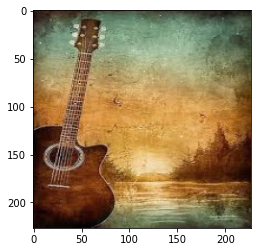

In [87]:
# 실제보니..답은 guitrat였다..


import cv2 

img = mpimg.imread(test_df["img_path"][1])
plt.imshow(img)

# 결론: 형편없는 model이구만

# 예측 결과를 pd로 깔끔히! 만들어보쟈 

In [96]:
labels = {0:'dog', 1:'elephant', 2:'giraffe', 3:'guitar', 4:"horse", 5:"house",
          6:'person'}
label = []
keyword=[]
for i in range(len(predictions)):
    pred = np.argmax(predictions[i])
    label.append(pred)
    keyword.append(labels[pred])

df = pd.DataFrame(label)
df["keyword"] = pd.DataFrame(keyword)
df

,0,keyword
0,6,person
1,4,horse
2,4,horse
3,4,horse
4,6,person
...,...,...
345,6,person
346,4,horse
347,6,person
348,1,elephant
